In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#Parameters

Dr = 0.5    #s^-1 rotational diffusion coefficient
tau = 1/Dr  
total_time = 10**4
dt = 1e-3       #time step
v_0 = 5e-6      #maximum speed
v_inf = 1e-6    #minimum speed


In [4]:
def orientation(w,tau):
    return np.sqrt(2/tau)*w

def x_position(theta,v,dt):
    return v*np.cos(theta)*dt

def y_position(theta,v,dt):
    return v*np.sin(theta)*dt

def ligth_intensity(x,a):
    return np.square(np.sin(2*np.pi*x/a))

def velocity(v_inf,v_0,I):      # eq 10.2
    return v_inf + (v_0 - v_inf)*np.exp(-I)

#Active Brownian Motion
def orientation_ABM(w_theta,Dt):
    return np.sqrt(2*Dt)*w_theta

def x_position_ABM(theta,v,dt,Dt,wx):
    return (v*np.cos(theta)+np.sqrt(2*Dt))*dt*wx

def y_position_ABM(theta,v,dt,Dt,wy):
    return (v*np.sin(theta)+np.sqrt(2*Dt))*dt*wy

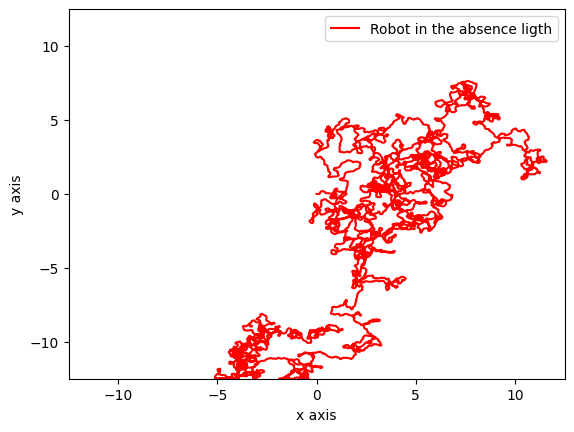

In [51]:
#10.1 a Motion of robot in the absence ligth
###################################
#Parameters
Dr = 1    #s^-1 rotational diffusion coefficient
tau = 5  
total_time = 10**4
dt = 1e-2       #time step
v_0 = 5e-6      #maximum speed
v_inf = 1e-6    #minimum speed
L = v_0*tau
####################################

# Create boundary
x_space = np.linspace(-L/2,L/2,num = total_time)
y_space = np.linspace(-L/2,L/2,num = total_time)

x = np.zeros(total_time)
y = np.zeros(total_time)
theta = np.zeros(total_time)



W = np.random.randn(total_time)
Wx = np.random.randn(total_time)
Wy = np.random.randn(total_time)
W_theta = np.random.randn(total_time)

I = 0
v = velocity(v_inf, v_0, I)

for t in range(1,total_time):
    w = W[t]
    theta[t] = orientation(w,tau) + theta[t-1]
    x[t] = x_position(theta[t],v,dt) + x[t-1]
    y[t] = y_position(theta[t],v,dt) + y[t-1]

    # Boundary check
    x[t] = max(-L/2, min(x[t], L/2))  # Ensure x stays within [-L/2, L/2]
    y[t] = max(-L/2, min(y[t], L/2))


plt.plot(x*1e6,y*1e6,color = 'r', label = 'Robot in the absence ligth')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.xlim(-L/2*1e6, L/2*1e6)
plt.ylim(-L/2*1e6, L/2*1e6)
plt.legend()

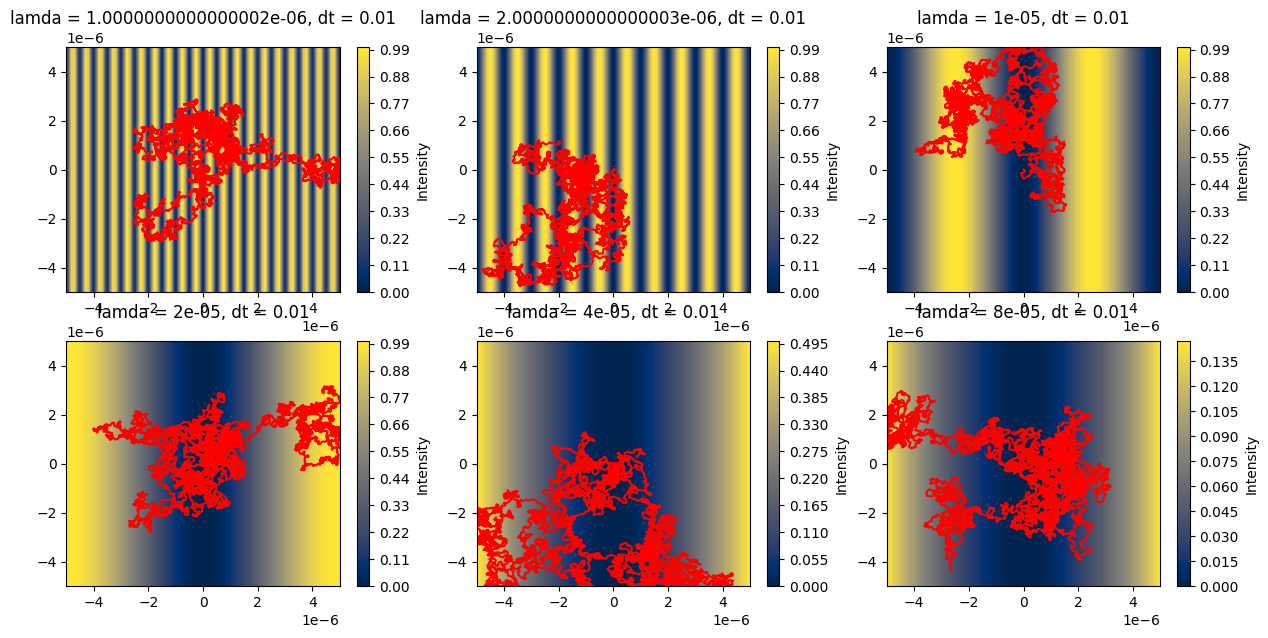

In [53]:
#10.1 b Motion of a robot in a periodic ligth pattern

###################################
#Parameters
Dr = 0.5    #s^-1 rotational diffusion coefficient
tau = 1/Dr  
total_time = 10**4
dt = 1e-2      #time step
v_0 = 5e-6      #maximum speed
v_inf = 1e-6    #minimum speed
####################################
#Initial v
v = v_inf
#v_y = v_inf

# Boundary
L = v_0*tau

#Wavelength for using in sine wave
wavelength_list = [L/10, L/5, L, 2*L, 4*L, 8*L] 
n_wavelength = len(wavelength_list)

I_x = np.zeros((n_wavelength,total_time))
subplot_index = 0

plt.figure(figsize=(15,7))
intensity_list = []
for i,wavelength in enumerate(wavelength_list):
    x_periodic = np.zeros(total_time)
    y_periodic = np.zeros(total_time)
    theta_periodic = np.zeros(total_time)
    W = np.random.randn(total_time)
    
    
    for t in range(1,total_time):
        w = W[t]
        theta_periodic[t] = orientation(w,tau) + theta_periodic[t-1]
        x_periodic[t] = x_position(theta_periodic[t],v,dt) + x_periodic[t-1]
        y_periodic[t] = y_position(theta_periodic[t],v,dt) + y_periodic[t-1]

        # Boundary check
        x_periodic[t] = max(-L/2, min(x_periodic[t], L/2))  # Ensure x stays within [-L/2, L/2]
        y_periodic[t] = max(-L/2, min(y_periodic[t], L/2))


        #Compute ligth intensity at (x,y)
        I_x[i,t] = ligth_intensity(x_periodic[t],wavelength)
        
        #update v
        v = velocity(v_inf,v_0,I_x[i,t])
        
    # Calculate the intensity field
    # Create a grid of x and y values
    x = np.linspace(-L/2, L/2, 100)
    y = np.linspace(-L/2, L/2, 100)
    x, y = np.meshgrid(x, y)
    intensity = ligth_intensity(x,wavelength)
    #intensity_list.append()
    subplot_index += 1
    plt.subplot(2,3, subplot_index )
    plt.title(f'lamda = {wavelength}, dt = {dt}')
    plt.contourf(x, y, intensity,  levels=100,cmap = 'cividis' )
    plt.colorbar(label='Intensity')
    plt.plot(x_periodic,y_periodic,c = 'r')
    #plt.xlim(-L/2, L/2)
    #plt.ylim(-L/2, L/2)
    #plt.xlabel('x-axis')
    #plt.ylabel('y-axis')
    
    

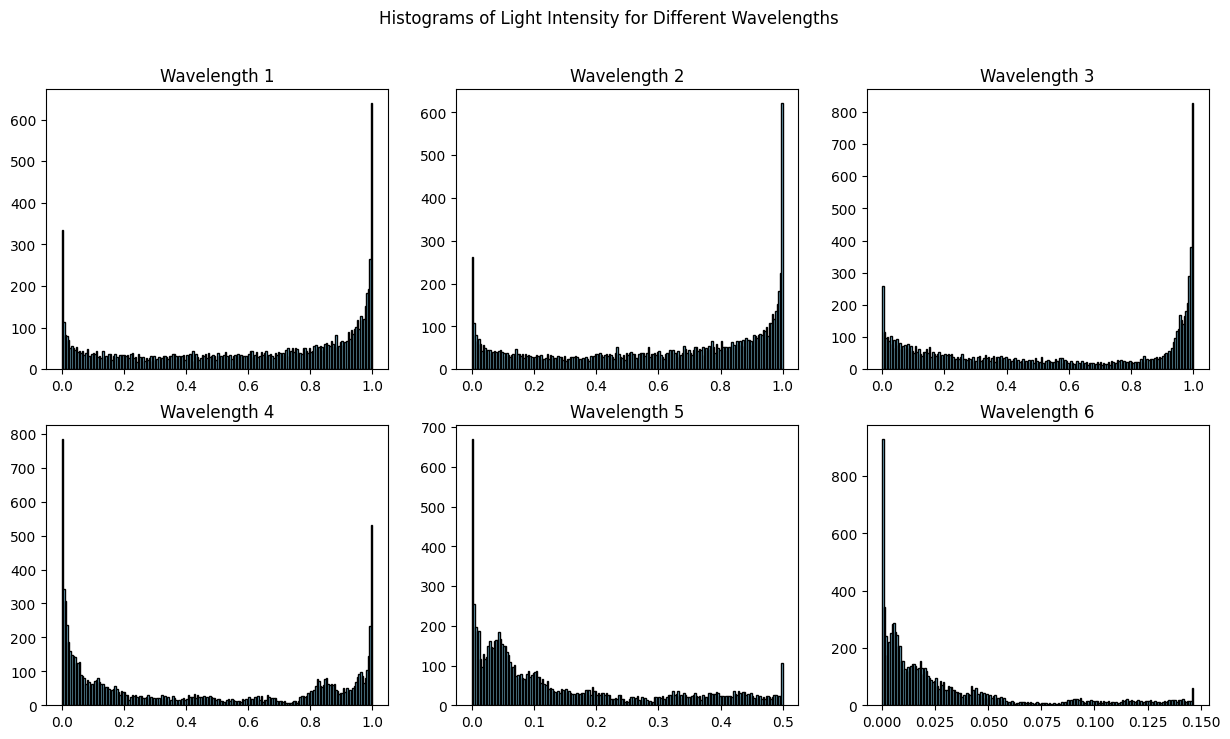

In [54]:
# Set the number of bins
n_bins = 200

# Create subplots for each wavelength
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Histograms of Light Intensity for Different Wavelengths")

# Flatten the axs array to iterate easily
axs = axs.flatten()

# Loop over wavelengths and plot histograms
for i, wavelength_data in enumerate(I_x):
    axs[i].hist(wavelength_data, bins=n_bins, color='skyblue', edgecolor='black')
    axs[i].set_title(f"Wavelength {i+1}")

In [8]:
#10.1 c
def ligth_intensity_time_varying(x,time,a,c):
    return np.square(np.sin(2*np.pi*(x-c*time)/a))


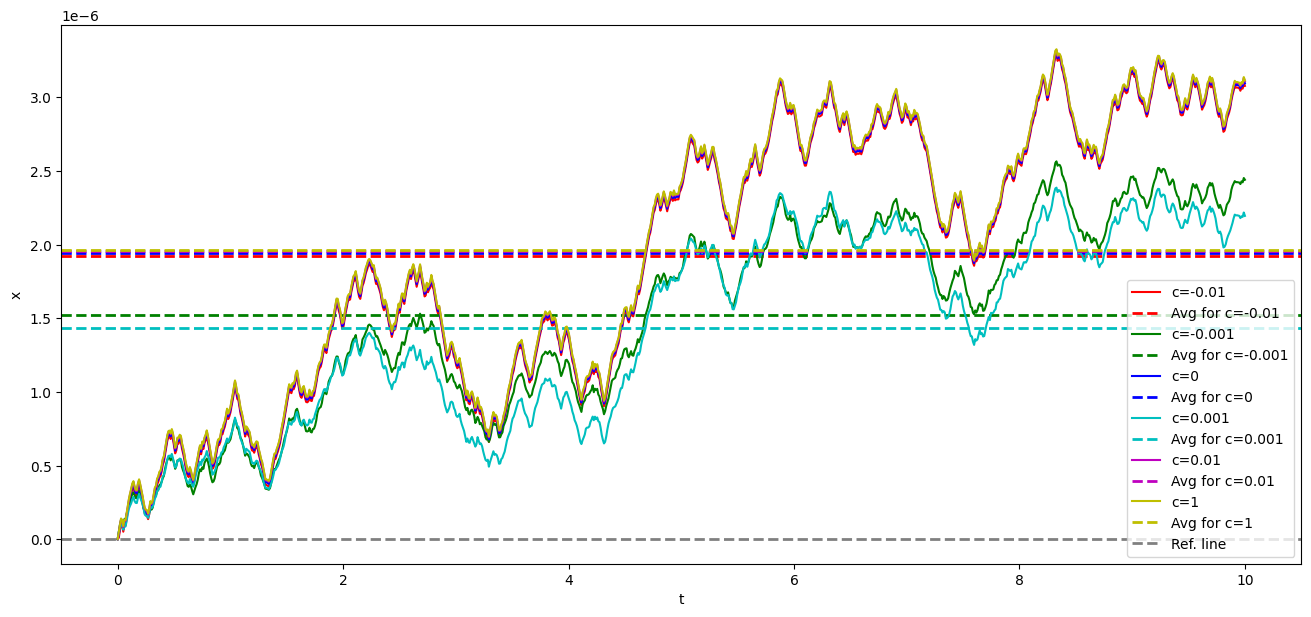

In [50]:
#Parameters
Dr = 0.5    #s^-1 rotational diffusion coefficient
tau = 1/Dr  
total_time = 10**3
dt = 1e-2      #time step
v_0 = 5e-6      #maximum speed
v_inf = 1e-6    #minimum speed
L = v_0*tau
#Initial v
v = v_inf

L = v_0*tau
a = 10*L     #wave length

c_list = [-1e-2,-1e-3,0,1e-3,1e-2,1]    #Re-check

x_time_varying = np.zeros(total_time)
y_time_varying = np.zeros(total_time)
theta_time_varying = np.zeros(total_time)
W = np.random.randn(total_time)
time = dt
time_axis = np.linspace(0, total_time*dt, num = total_time)


subplot_index = 0
plt.figure(figsize=(16,7))
colors_list = ['r', 'g', 'b', 'c', 'm','y','k']
for i,c in enumerate(c_list):
    x_time_varying = np.zeros(total_time)
    y_time_varying = np.zeros(total_time)
    theta_time_varying = np.zeros(total_time)
    for step in range(1,total_time):
        w = W[step]
        theta_time_varying[step] = orientation(w,tau) + theta_time_varying[step-1]
        x_time_varying[step] = x_position(theta_time_varying[step],v,dt) + x_time_varying[step-1]
        y_time_varying[step] = y_position(theta_time_varying[step],v,dt) + y_time_varying[step-1]
        
        
        #Compute ligth intensity 
        I_x = ligth_intensity_time_varying(x_time_varying[step],time,a,c)
        
        #update ime
        time += dt
        
        #update v
        v = velocity(v_inf,v_0,I_x)
    #subplot_index += 1
    #plt.subplot(2,3, subplot_index )
    plt.plot(time_axis,x_time_varying, label = f'c={c}', color = colors_list[i])
    plt.axhline(np.mean(x_time_varying), linestyle='dashed', linewidth=2, label=f'Avg for c={c}',color = colors_list[i])
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x')
plt.axhline(0,linestyle='dashed', linewidth=2, color='gray', label = 'Ref. line')
plt.legend()

#plt.xlim(-5,5)
#plt.ylim(-5,5)
